**INITIALIZATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**DOWNLOADING LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [3]:
#@ INSTALLING DEPENDENCIES: UNCOMMENT BELOW: 
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()

In [4]:
#@ DOWNLOADING LIBRARIES AND DEPENDENCIES: 
from fastai.vision.all import *                         # Getting all the Libraries. 
from fastbook import *                                  # Getting all the Libraries. 
matplotlib.rc("image", cmap="Greys")                    # Initializing Dependencies. 

**GETTING THE DATA:**
- I will download a sample of **MNIST**. 


In [5]:
#@ GETTING THE DATA: 
PATH = untar_data(URLs.MNIST_SAMPLE)                    # Path to the Dataset. 
PATH.ls()                                               # Inspecting Items. 

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid')]

In [6]:
#@ INSPECTING THE TRAINING SET:  
(PATH/"train").ls()                                     # Inspecting Items. 

(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

In [7]:
#@ INSPECTING THE FOLDERS: 
threes = (PATH/"train"/"3").ls().sorted()               # Getting Same Order of Items. 
sevens = (PATH/"train"/"7").ls().sorted()               # Getting Same Order of Items. 
threes                                                  # Inspecting Items. 

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [8]:
#@ INSPECTING IMAGE: 
im3_path = threes[1]                                    # Path to the Image. 
im3 = Image.open(im3_path)                              # Getting an Image. 
im3

In [9]:
#@ CONVERTING INTO ARRAY: 
array(im3)[4:10, 4:10]                                  # Getting Numpy Array. 

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [10]:
#@ CONVERTING INTO ARRAY: 
tensor(im3)[4:10, 4:10]                                 # Getting a Tensor. 

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [11]:
#@ INSPECTING PIXELS: 
im3_t = tensor(im3)                                     # Getting a Tensor. 
df = pd.DataFrame(im3_t[4:15, 4:22])                    # Creating a DataFrame. 
df.style.set_properties(**{"font-size":"6pt"})\
        .background_gradient("Greys")                   # Inspecting the Image. 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


**PIXEL SIMILARITY:**
- I will get the average of pixel values for each groups of 3 and 7. I will create a tensor containing all the 3s stacked together. 

In [12]:
#@ GETTING TENSOR VALUES: 
seven_tensors = [tensor(Image.open(o)) for o in sevens]         # Initializing Tensor Values. 
three_tensors = [tensor(Image.open(o)) for o in threes]         # Initializing Tensor Values. 
len(three_tensors), len(seven_tensors)                          # Inspecting Number of Tensors. 

(6131, 6265)

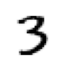

In [13]:
#@ INSPECTING A IMAGE: 
show_image(three_tensors[1]);                                   # Inspecting a Image. 

In [14]:
#@ GETTING STACKED TENSORS OF FLOATS: 
stacked_sevens = torch.stack(seven_tensors).float() / 255       # Getting Stacked Tensors. 
stacked_threes = torch.stack(three_tensors).float() / 255       # Getting Stacked Tesnors. 
stacked_threes.shape                                            # Inspecting Shape of Stack. 

torch.Size([6131, 28, 28])

In [15]:
#@ RANK OF TENSORS: 
len(stacked_threes.shape)                                       # Getting Rank of Tensor. 

3

In [16]:
#@ RANK OF TENSORS: 
stacked_threes.ndim                                # Getting Rank of Tensor. 

3

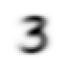

In [17]:
#@ MEAN OF IMAGE TENSORS: 
mean3 = stacked_threes.mean(0)                     # Getting Mean of Pixels. 
show_image(mean3);                                 # Inspecting the Mean. 

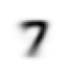

In [18]:
#@ MEAN OF IMAGE TENSORS:
mean7 = stacked_sevens.mean(0)                     # Getting Mean of Pixels. 
show_image(mean7);                                 # Inspecting the Mean. 

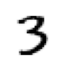

In [19]:
#@ GETTING SAMPLE IMAGE: 
a_3 = stacked_threes[1]                            # Getting an Element. 
show_image(a_3);                                   # Inspecting the Item. 

**Note:**
- Taking the mean of absolute value of differences is called **Mean Absolute Difference** or **L1 Norm**.
- Taking the mean of square of differences and then taking the square root is called **Root Mean Squared Error** or **L2 Norm**. 

In [20]:
#@ CALCULATING L1 NORM AND L2 NORM:
dist_3_abs = (a_3 - mean3).abs().mean()            # Getting L1 Norm. 
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()      # Getting L2 Norm. 
dist_3_abs, dist_3_sqr                             # Inspecting the Results. 

(tensor(0.1114), tensor(0.2021))

In [21]:
#@ CALCULATING L1 NORM AND L2 NORM: 
dist_7_abs = (a_3 - mean7).abs().mean()            # Getting L1 Norm. 
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()      # Getting L2 Norm. 
dist_7_abs, dist_7_sqr                             # Inspecting the Results. 

(tensor(0.1586), tensor(0.3021))

In [22]:
#@ CALCULATING L1 NORM AND L2 NORM: 
print(F.l1_loss(a_3.float(), mean7))               # Getting L1 Norm. 
print(F.mse_loss(a_3, mean7).sqrt())               # Getting L2 Norm. 

tensor(0.1586)
tensor(0.3021)


**ARRAYS AND TENSORS:**

In [23]:
#@ ARRAYS AND TENSORS: 
data = [[1, 2, 3], [4, 5, 6]]                      # Example List. 
arr = array(data)                                  # Creating Array. 
tns = tensor(data)                                 # Creating Tensor. 
arr, tns                                           # Inspecting the Results. 

(array([[1, 2, 3],
        [4, 5, 6]]), tensor([[1, 2, 3],
         [4, 5, 6]]))

**COMPUTING METRICS USING BROADCASTING:**

In [24]:
#@ CREATING VALIDATION DATASET: 
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in \
                            (PATH/"valid"/"3").ls()])              # Creating Validation Tensors. 
valid_3_tens = valid_3_tens.float() / 255                          # Getting Normalized Tensors. 
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in \
                            (PATH/"valid"/"7").ls()])              # Creating Validation Tensors. 
valid_7_tens = valid_7_tens.float() / 255                          # Getting Normalized Tensors. 
valid_3_tens.shape, valid_7_tens.shape                             # Inspecting the Shape of Tensors. 

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [25]:
#@ FUNCTION FOR CALCULATING MAE: 
def mnist_distance(a, b):                                # Initializing Function. 
    return (a - b).abs().mean((-1, -2))                  # Getting MAE. 
mnist_distance(a_3, mean3)                               # Implementation of Function.                     

tensor(0.1114)

In [26]:
#@ IMPLEMENTATION OF MAE: 
valid_3_dist = mnist_distance(valid_3_tens, mean3)       # Initializing the Function. 
valid_3_dist, valid_3_dist.shape                         # Inspecting the Results. 

(tensor([0.1163, 0.1270, 0.1241,  ..., 0.1454, 0.1078, 0.1365]),
 torch.Size([1010]))

**Note:**
- I will use the function to figure out whether an image is a 3 by using the following logic: If the distance between the digit in a question and the ideal 3 is less than the distance to the ideal 7 then it's 3.

In [27]:
#@ DEFINING THE FUNCTION: 
def is_3(x):                                                        # Initializing the Function. 
    return mnist_distance(x, mean3) < mnist_distance(x, mean7)      # Inspecting Distance. 
is_3(a_3), is_3(a_3).float()                                        # Inspecting the Results. 

(tensor(True), tensor(1.))

In [28]:
#@ INSPECTING ACCURACY: 
accuracy_3s = is_3(valid_3_tens).float().mean()                     # Getting Accuracy. 
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()               # Getting Accuracy. 
accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s) / 2           # Getting Results. 

(tensor(0.9168), tensor(0.9854), tensor(0.9511))